Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Applied Modeling, Module 3

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploration, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Share at least 1 visualization on Slack.

(If you have not yet completed an initial model yet for your portfolio project, then do today's assignment using your Tanzania Waterpumps model.)

## Stretch Goals
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

## Links
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

## Columns

**Country** Country

**Year** Year

**Status** Developed or Developing status

**Life expectancy** Life Expectancy in age

**Adult Mortality** Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

**infant** deaths Number of Infant Deaths per 1000 population

**Alcohol** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
percentage 

**expenditure** Expenditure on health as a percentage of Gross Domestic Product per capita(%)

**Hepatitis B** Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

**Measles** Measles - number of reported cases per 1000 population

**BMI** Average Body Mass Index of entire population

**under-five deaths** Number of under-five deaths per 1000 population

**Polio** Polio (Pol3) immunization coverage among 1-year-olds (%)

**Total expenditure** General government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

**HIV/AIDS** Deaths per 1 000 live births HIV/AIDS (0-4 years)

**GDP** Gross Domestic Product per capita (in USD)

**Population** Population of the country

**thinness 1-19 years** Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

**thinness 5-9 years** Prevalence of thinness among children for Age 5 to 9(%)

**Income composition of resources** Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

**Schooling** Number of years of Schooling(years) 

In [26]:
'''
After running a few models, i realized i have a leakage in my data.

Income composition of importances is leaking what the life expectancy 
should be. 

The Human Development Index (HDI) is a statistic composite index of 
life expectancy, education, and per capita income indicators, 
which are used to rank countries into four tiers of human development. 
... Examples include—Being: well fed, sheltered, healthy; Doings: 
work, education, voting, participating in community life.'''

'\nAfter running a few models, i realized i have a leakage in my data.\n\nIncome composition of importances is leaking what the life expectancy \nshould be. \n\nThe Human Development Index (HDI) is a statistic composite index of \nlife expectancy, education, and per capita income indicators, \nwhich are used to rank countries into four tiers of human development. \n... Examples include—Being: well fed, sheltered, healthy; Doings: \nwork, education, voting, participating in community life.'

In [0]:
# Choose your target. Which column in your tabular dataset will you predict?

# Life expectancy 

# Is your problem regression or classification?
# Regression

# Random Split

# How is your target distributed?
# target distribution is not a major factor. 

# Choose your evaluation metric(s).

#R2 to get a general idea of how well my model will fit to unseen data
#mean absolute error and root mean squared error to see the average error in 
#my prediction. 

 # How is your target distributed?
 # I am going to answer this using a pandas profile. 

data = 'https://raw.githubusercontent.com/EvidenceN/Life-Expectancy-Prediction/master/Life%20Expectancy/Data/Life%20Expectancy%20Data.csv'

 

In [28]:
import pandas as pd

life = pd.read_csv(data)

life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [29]:
life.shape

(2938, 22)

In [0]:
%%capture
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*
import pandas_profiling

In [0]:
profile = pandas_profiling.ProfileReport(life)

In [32]:

profile

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Due to the nature of the dataset, i can not use imputation with a mean or median strategy. If i use imputation, 
# then i am taking information from other countries and putting it in for a different country. 
# for example, i will be taking population and GDP information from a different countries and imputing it as the
# population and GDP of a different countries. That information would be inaccurate. 

# I could meticoulously look up the information from the countries with missing data, but that would consume a lot of 
# time. 

In [0]:
# Drop rows with missing gdp and population information. That would leave me with 145 countries instead of 193 and 
# 75% of the total data. By doing this, i will loose 25% of the data. 

# for other features like Bmi, thinness, hepatitis B with missing values, i will input 0's for those missing values. 
# if values are missing for those features, 0 is a safe assumption and won't skew the data or disrupt the interpretation
# of the data

# XGboost can handle nan, but other models might struggle to handle nan, since imputation is not a viable option, then
# i will use 0 in place of nan's

# drop country and years because we are not comparing life expectancy from different countries or trying to see
# if the life exptancy of a country changes from year to year. The country and year the data originated from should 
# not be a predictor of life expectancy. 

# The objective is to use health factors to predict life expectancy. Having data from different countries over the
# years allows for diversity of information. 

# 

In [0]:
# drop gdp and population and life expectancy missing values
life = life.dropna(subset=['GDP', 'Population', 'Life_expectancy_'])

In [36]:
# get the mean baseline because this is a regression problem
# with regression, the baseline can be as simple as the mean.

mean_baseline = life['Life_expectancy_'].mean()
print(f'Mean Baseline: {mean_baseline:.1f} years')
print('Without any other factors, this is what we will predict the life expectancy to be')

Mean Baseline: 68.7 years
Without any other factors, this is what we will predict the life expectancy to be


In [0]:
# split into train, test, validation 15% for testing, 15% for validation, 70% training. 
# No stratification in splitting because of ValueError: The least populated class in y has 
# only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

from sklearn.model_selection import train_test_split

train, test = train_test_split(life, test_size=0.15, random_state=42)

train, val = train_test_split(train, test_size=0.20, random_state=42)

In [0]:
# function to perform data cleaning on all datasets. 
def wrangle(x):
    x = x.copy()
    
    mapper = {'Country':'country', 'Year':'year', 'Status':'status', 'Life_expectancy_':'life expectancy', 
          'Adult_Mortality':'adult mortality', 'infant_deaths': 'infant deaths', 'Alcohol':'alcohol',
         'percentage_expenditure' :'percentage expenditure', 'Hepatitis_B': 'hepatitis B', 
          'Measles_': 'measles', '_BMI_': 'BMI', 'under-five_deaths_':'under five deaths', 'Polio':'polio',
         'Total_expenditure': 'total expenditure', 'Diphtheria_':'diphtheria', '_HIV/AIDS': 'HIV AIDS', 
          'Population':'population', '_thinness__1-19_years': 'thinness 1-19 years', 
          '_thinness_5-9_years': 'thinness 5-9 years', 
          'Income_composition_of_resources': 'income composition of resources', 'Schooling': 'schooling'}

    x = x.rename(columns=mapper)
    x = x.drop(columns = ['country', 'year', 'income composition of resources'])
    x = x.fillna(value=0)
    
    return x

In [0]:
# clean all data the same way
train = wrangle(train)
test = wrangle(test)
val = wrangle(val)

In [0]:
target = 'life expectancy'
features = train.columns.drop(target)

x_train = train[features]
y_train = train[target]
x_val = val[features]
y_val = val[target]
x_test = test[features]
y_test = test[target]

In [41]:
val.head()

,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis B,measles,BMI,under five deaths,polio,total expenditure,diphtheria,HIV AIDS,GDP,population,thinness 1-19 years,thinness 5-9 years,schooling
2210,Developing,71.6,16.0,0,3.63,287.467130,41.0,0,69.7,0,55.0,4.47,49.0,0.1,2571.262348,179929.0,0.2,0.2,12.6
1173,Developed,82.5,5.0,0,7.81,6818.546407,0.0,0,59.7,0,89.0,8.68,89.0,0.1,44333.851800,32716.0,1.0,0.9,18.7
2472,Developing,58.6,284.0,71,1.76,30.860010,0.0,2875,0.0,109,62.0,3.23,62.0,0.1,361.358430,2725535.0,0.0,0.0,5.5
2255,Developing,63.5,219.0,21,0.30,1.177478,86.0,999,21.2,33,83.0,4.81,86.0,0.5,12.566464,1255917.0,1.6,1.5,7.5
770,Developing,73.9,152.0,6,0.00,0.000000,81.0,0,58.9,7,87.0,0.00,85.0,0.3,6468.471648,1528394.0,3.3,3.2,13.2


In [0]:
# import libraries
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score
import category_encoders as ce
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


LinearRegression R^2 Score 0.8293940454000761
LinearRegression mean_absolute_error 3.008971892994535


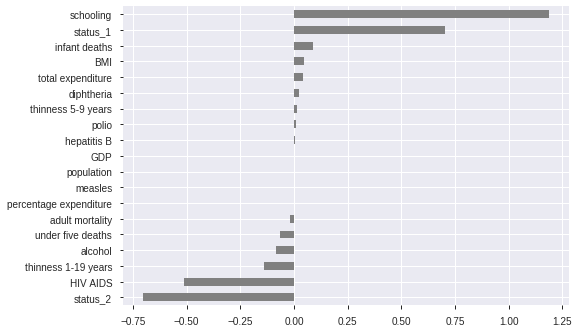

In [43]:
# beginning with linear regression model. 

# lr = linear regression model
lr = make_pipeline(
    ce.OneHotEncoder(),
    LinearRegression()
)

lr.fit(x_train, y_train)
lr_score = lr.score(x_val, y_val)

print(f'LinearRegression R^2 Score {lr_score}')

y_pred = lr.predict(x_val)

mae = mean_absolute_error(y_val, y_pred)

print(f'LinearRegression mean_absolute_error {mae}' )

coeff = lr.named_steps['linearregression'].coef_
#print(f'LinearRegression Coefficient {coeff}')

intercept = lr.named_steps['linearregression'].intercept_
#print(f'LinearRegression Intercept {intercept}')

# plotting the coefficients
encoder = lr.named_steps['onehotencoder']
columns = encoder.transform(x_val).columns
coefficients = pd.Series(coeff, columns)
coefficients.sort_values().plot.barh(color='grey');

In [44]:
# ridge regression model

for alpha in [10, 100, 10**3, 10**4, 10**5, 10**6]:
  print(f'for ridge regression with {alpha}')

  ridge = make_pipeline(
      ce.OneHotEncoder(),
      StandardScaler(),
      Ridge(alpha=alpha))
  
  # fitting the model
  ridge.fit(x_train, y_train)

  # mean absolute error
  y_pred = ridge.predict(x_val)
  mae = mean_absolute_error(y_val, y_pred)
  print(f'Ridge regression mean_absolute_error {mae}' )

  # R2 score
  ridge_score = ridge.score(x_val, y_val,)
  print(f'Ridge Regression Score R^2 Score {ridge_score}\n')

# best ridge regression alpha is 10. 


for ridge regression with 10
Ridge regression mean_absolute_error 3.074867124918658
Ridge Regression Score R^2 Score 0.8224344646204009

for ridge regression with 100
Ridge regression mean_absolute_error 3.0999088690751675
Ridge Regression Score R^2 Score 0.8193000716555944

for ridge regression with 1000
Ridge regression mean_absolute_error 3.4086254222499814
Ridge Regression Score R^2 Score 0.7889378047255081

for ridge regression with 10000
Ridge regression mean_absolute_error 5.488518114002498
Ridge Regression Score R^2 Score 0.49617099224449923

for ridge regression with 100000
Ridge regression mean_absolute_error 7.3740692899732965
Ridge Regression Score R^2 Score 0.1005129792690107

for ridge regression with 1000000
Ridge regression mean_absolute_error 7.735218812969965
Ridge Regression Score R^2 Score 0.010785966995643381



Ridge regression mean_absolute_error 3.074867124918658
Ridge Regression Score R^2 Score 0.8224344646204009

Ridge Regression Coefficient [ 0.27067164 -0.27067164 -2.21392701  3.96472774 -0.47028996 -0.02209428
  0.14115903 -0.32540185  0.94351122 -3.85686401  0.23789349  0.11180353
  0.68949174 -2.61549176  0.91299596  0.03054351 -0.63571571  0.12931534
  4.13989061]
Ridge Regression Intercept 68.67859466493168


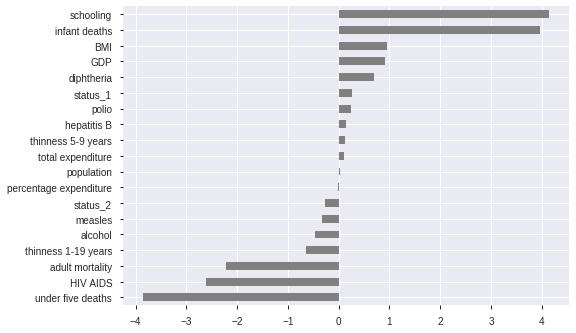

In [45]:
ridge = make_pipeline(
      ce.OneHotEncoder(),
      StandardScaler(),
      Ridge(alpha=10))
  
  # fitting the model
ridge.fit(x_train, y_train)

  # mean absolute error
y_pred = ridge.predict(x_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Ridge regression mean_absolute_error {mae}' )

  # R2 score
ridge_score = ridge.score(x_val, y_val,)
print(f'Ridge Regression Score R^2 Score {ridge_score}\n')

coeff = ridge.named_steps['ridge'].coef_
print(f'Ridge Regression Coefficient {coeff}')

intercept = ridge.named_steps['ridge'].intercept_
print(f'Ridge Regression Intercept {intercept}')

# plotting the coefficients
encoder = ridge.named_steps['onehotencoder']
columns = encoder.transform(x_val).columns
coefficients = pd.Series(coeff, columns)
coefficients.sort_values().plot.barh(color='grey');

In [46]:
# decision tree model

tree = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeRegressor(random_state=42)
)

tree.fit(x_train, y_train)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['status'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'status',
                                          'data_type': dtype('O'),
                                          'mapping': Developed     1
Developing    2
NaN          -2
dtype: int64}],
                                return_df=True, verbose=0)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(criterion='mse', max_depth=None,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                

In [47]:
# mean absolute error
y_pred = tree.predict(x_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Decision tree mean_absolute_error {mae}' )

# R2 score
tree_score = tree.score(x_val, y_val,)
print(f'Decision tree Score R^2 Score {tree_score}')

Decision tree mean_absolute_error 1.576883116883117
Decision tree Score R^2 Score 0.9318095472748055


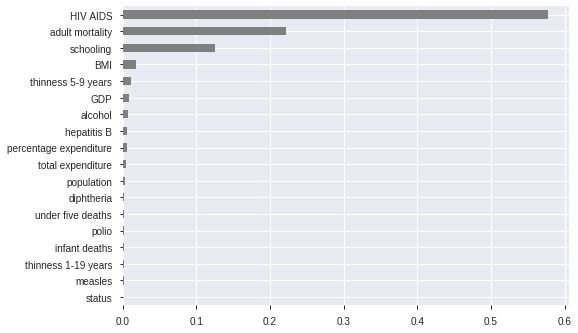

In [48]:
# plotting the feature importances
model = tree.named_steps['decisiontreeregressor']
encoder = tree.named_steps['ordinalencoder']
columns = encoder.transform(x_val).columns
importances = pd.Series(model.feature_importances_, columns)
importances.sort_values().plot.barh(color='grey');

randome forest mean_absolute_error 1.1758441558441546
random forest Score R^2 Score 0.9633243100155312


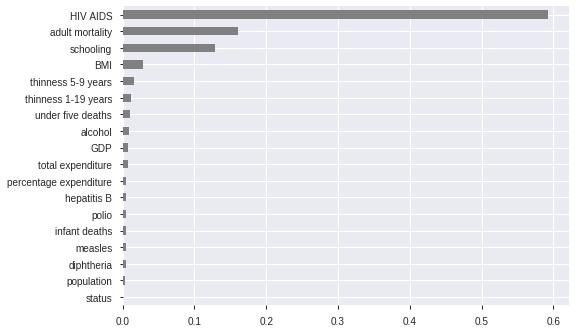

In [49]:
# random forest model

forest = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1)
)

forest.fit(x_train, y_train)

# mean absolute error
y_pred = forest.predict(x_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'random forest mean_absolute_error {mae}' )

# R2 score
forest_score = forest.score(x_val, y_val,)
print(f'random forest Score R^2 Score {forest_score}')

# plotting the feature importances
model = forest.named_steps['randomforestregressor']
encoder = forest.named_steps['ordinalencoder']
columns = encoder.transform(x_val).columns
importances = pd.Series(model.feature_importances_, columns)
importances.sort_values().plot.barh(color='grey');

[04:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
gradient boosting mean_absolute_error 1.6266624906465608
gradient boosting Score R^2 Score 0.9437985736094852


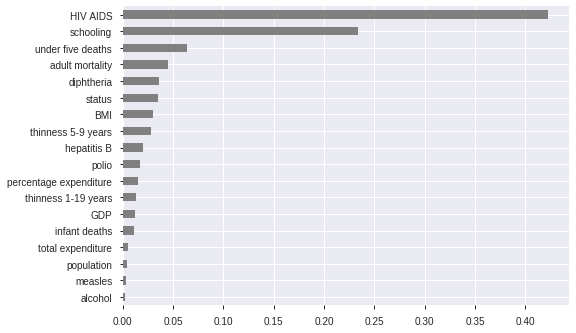

In [50]:
# random forest model

boost = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(random_state=42, n_estimators=100, n_jobs=-1)
)

boost.fit(x_train, y_train)

# mean absolute error
y_pred = boost.predict(x_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'gradient boosting mean_absolute_error {mae}' )

# R2 score
boost_score = boost.score(x_val, y_val,)
print(f'gradient boosting Score R^2 Score {boost_score}')

# plotting the feature importances
model = boost.named_steps['xgbregressor']
encoder = boost.named_steps['ordinalencoder']
columns = encoder.transform(x_val).columns
importances = pd.Series(model.feature_importances_, columns)
importances.sort_values().plot.barh(color='grey');

In [0]:
# Tomorrow, 

# Permutation importances, PDP, and shapley values

In [51]:
# using my best model which is the random forest model for prediction
# with my test data set. 
y_pred = forest.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'random forest mean_absolute_error {mae}' )

# R2 score
forest_score = forest.score(x_test, y_test,)
print(f'random forest Score R^2 Score {forest_score}')

random forest mean_absolute_error 1.33325588235294
random forest Score R^2 Score 0.9574941080764781
